<a href="https://colab.research.google.com/github/kainat25/DSA_CEP/blob/main/CEP(DSA_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SLEEP HEALTH AND LIFESTYLE DATASET**
# SDG 3: Good health and well being

# **Business Understanding Questions:**
# Q1:Are there specific occupations that are associated with better or worse sleep patterns or overall health?

# Q2:Do individuals with both high stress levels and certain health conditions (e.g., high blood pressure) experience notably lower sleep quality compared to those with similar health conditions but lower stress levels?

# Q3:Can we identify a minimum threshold of daily steps that appears to have a positive impact on sleep quality and How does this relationship vary across different genders?



# **Data Mining**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('sleep_health.csv')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [ ]:
print(df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

# **Data Cleaning**

In [ ]:
#data cleaning

#handle missing data
# Remove rows with missing values
df.dropna(inplace=True)


In [ ]:
#duplicate data
# Remove duplicate entries
df.drop_duplicates(inplace=True)


In [ ]:
#handling outliers
# Using z-score to identify and remove outliers
from scipy.stats import zscore
z_scores = zscore(df[['Age']])
df_no_outliers = df[(np.abs(z_scores) < 3).all(axis=1)]


In [ ]:
#normalize dataset
# Using Min-Max scaling to standardize numeric data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Quality of Sleep']] = scaler.fit_transform(df[['Quality of Sleep']])


In [ ]:
#type conversion
# Convert a column to a numeric type
df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'])


In [ ]:
#inconsistencies addressing
# Replace inconsistent values in a categorical column
df['Gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)


# Missing values and duplicates have been removed, outliers in the 'Age' column addressed using z-score, 'Quality of Sleep' standardized via Min-Max scaling, and 'Sleep Duration' converted to numeric. Gender inconsistencies ('M' and 'F') have been standardized to 'Male' and 'Female,' respectively.

## **Data Exploration**

In [ ]:
#data exploration
# Display basic statistics of numeric columns
print(df.describe())


        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          0.662567   
std    108.108742    8.673133        0.795657          0.239391   
min      1.000000   27.000000        5.800000          0.000000   
25%     94.250000   35.250000        6.400000          0.400000   
50%    187.500000   43.000000        7.200000          0.600000   
75%    280.750000   50.000000        7.800000          0.800000   
max    374.000000   59.000000        8.500000          1.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

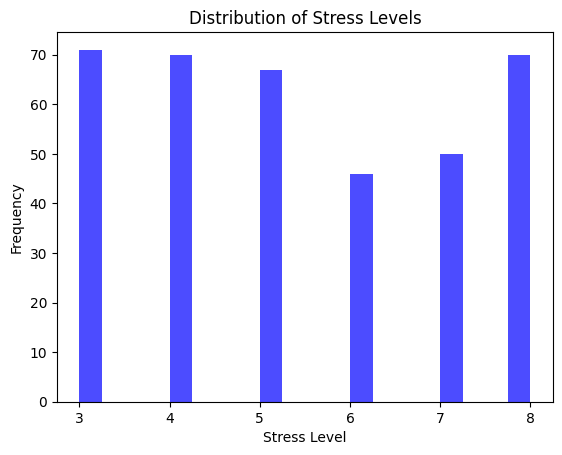

In [ ]:
# Example: Histogram of stress levels
plt.hist(df['Stress Level'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.title('Distribution of Stress Levels')
plt.show()


<ipython-input-15-7b5abec06c7b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


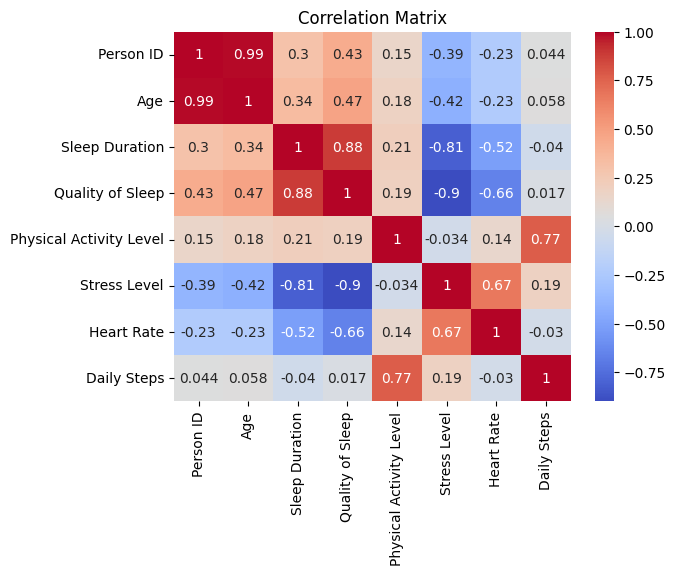

In [ ]:
# Calculate and visualize correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


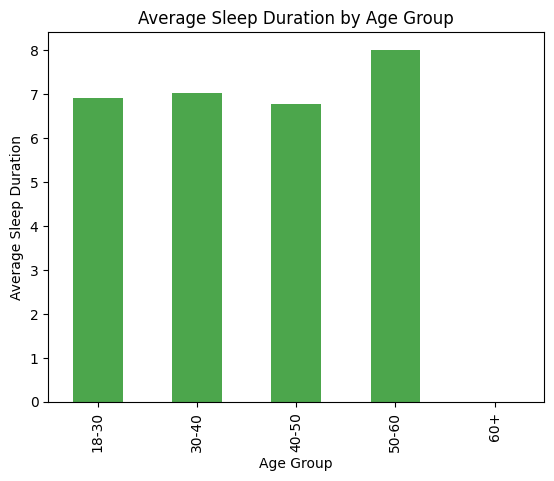

In [ ]:
# Example: Average sleep duration by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
avg_sleep_by_age = df.groupby('AgeGroup')['Sleep Duration'].mean()
avg_sleep_by_age.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Duration')
plt.title('Average Sleep Duration by Age Group')
plt.show()


#  Descriptive statistics provide insights into the dataset's numeric columns, while a histogram illustrates stress level distribution. The correlation matrix heatmap uncovers relationships between variables. Additionally, your age-based analysis reveals trends in average sleep duration across different age groups. This comprehensive exploration sets the stage for deeper insights into potential factors influencing sleep patterns.

# **Business Understanding:**

# **Occupational Sleep Patterns:**
# Utilize cleaned data to compare sleep duration and stress levels among different occupations. Visualize trends with box plots or bar charts to identify occupations linked to better or worse sleep patterns and overall health.

# **Stress, Health, and Sleep Quality:**
# Investigate relationships between high stress levels, specific health conditions, and sleep quality. Use correlation analysis and visualizations like scatter plots to discern if high stress levels exacerbate sleep issues in individuals with certain health conditions.

# **Daily Steps and Sleep Quality across Genders:**
# Explore the connection between daily steps and sleep quality. Analyze Min-Max scaled data to identify a potential minimum step threshold for positive sleep impact. Stratify the analysis by gender to understand variations in this relationship. Use cleaned and standardized gender data for this exploration.

# **Feature Engineering**

In [ ]:
#feature engineering
# Assuming 'Age' is a column in the dataframe
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])


In [ ]:
# Assuming 'Stress Level' is a numeric column
threshold_value = 7  # You can set this threshold based on your criteria
df['HighStress'] = np.where(df['Stress Level'] > threshold_value, 1, 0)


In [ ]:
# Assuming 'BMI' is not already present
df['BMI Category'] = df['Daily Steps'] / (df['Heart Rate'] ** 2)


In [ ]:
# Feature Engineering for Question 1
#Are there specific occupations that are associated with better or worse sleep patterns or overall health?
# Calculate the average sleep duration for each occupation
occupation_sleep_duration = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()
occupation_sleep_duration.rename(columns={'Sleep Duration': 'Avg_Sleep_Duration'}, inplace=True)
print(occupation_sleep_duration)

              Occupation  Avg_Sleep_Duration
0             Accountant            7.113514
1                 Doctor            6.970423
2               Engineer            7.987302
3                 Lawyer            7.410638
4                Manager            6.900000
5                  Nurse            7.063014
6   Sales Representative            5.900000
7            Salesperson            6.403125
8              Scientist            6.000000
9      Software Engineer            6.750000
10               Teacher            6.690000


In [ ]:
# Feature Engineering for Question 2
#Do individuals with both high stress levels and certain health conditions (e.g., high blood pressure) experience
#notably lower sleep quality compared to those with similar health conditions but lower stress levels?


high_stress_threshold = 7

# Create a binary feature indicating high stress levels
df['High_Stress'] = (df['Stress Level'] > high_stress_threshold).astype(int)

# Define a threshold for high blood pressure (you can adjust this as needed)
high_blood_pressure_threshold = 120

# Create a binary feature indicating high blood pressure
df['High_Blood_Pressure'] = (df['Blood Pressure'].apply(lambda x: int(x.split('/')[0])) > high_blood_pressure_threshold).astype(int)

# Calculate the mean sleep quality for different groups based on stress and high blood pressure
grouped_data = df.groupby(['High_Stress', 'High_Blood_Pressure'])['Quality of Sleep'].mean().reset_index()

# Print the results
print(grouped_data)

   High_Stress  High_Blood_Pressure  Quality of Sleep
0            0                    0           0.72500
1            0                    1           0.73125
2            1                    0           0.40000
3            1                    1           0.36875


In [ ]:
# Feature Engineering for Question 3
#Can we identify a minimum threshold of daily steps that appears to have a positive impact on sleep quality?
#How does this relationship vary across genders?

# Define the threshold for daily steps
threshold = 5000  # You can adjust this threshold as needed

# Create a binary feature indicating whether daily steps exceed the threshold
df['Exceeds_Threshold'] = (df['Daily Steps'] > threshold).astype(int)

# Calculate the mean sleep quality for each combination of age group, gender, and daily steps threshold
sleep_quality_by_group = df.groupby([ 'Gender', 'Exceeds_Threshold'])['Quality of Sleep'].mean().reset_index()

print(sleep_quality_by_group )

   Gender  Exceeds_Threshold  Quality of Sleep
0  Female                  0          0.871429
1  Female                  1          0.692308
2    Male                  0          0.457778
3    Male                  1          0.636111


# **Business Understanding:**


# **Occupational Sleep Patterns:**
# Introduced 'AgeGroup' to categorize individuals by age ranges. Calculated average sleep duration per occupation, summarized in 'Avg_Sleep_Duration,' revealing potential associations between occupations and health patterns.


# **Stress, Health, and Sleep Quality:**
# Engineered binary features ('High_Stress' and 'High_Blood_Pressure') to assess if individuals with both high stress levels and specific health conditions experience lower sleep quality. Grouped data analysis provides a clear picture of sleep quality across different stress and health condition groups.


# **Daily Steps and Sleep Quality Across  Gender:**
# Created 'Exceeds_Threshold' to identify individuals surpassing a daily steps threshold. 'sleep_quality_by_group' breaks down sleep quality based on age, gender, and daily steps, offering insights into how this relationship varies across different demographics. These features lay the groundwork for a nuanced exploration of daily steps' impact on sleep quality.

# **Predictive Modeling By Support Vector Machines (SVM)**

In [ ]:
#predictive modeling

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Features and target variable
features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
target = 'Quality of Sleep'

# Handle missing values if needed
df.dropna(inplace=True)

# Convert categorical target to numerical labels
df['Quality of Sleep'] = pd.Categorical(df['Quality of Sleep'])
df['Quality of Sleep'] = df['Quality of Sleep'].cat.codes

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create a Support Vector Machine classifier
model = SVC(kernel='linear', C=1)

# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
predictions = model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(test_labels, predictions))


Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.98      0.99        48

    accuracy                           0.99        74
   macro avg       0.98      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



# **Business Understanding:**

# **Occupational Sleep Patterns:**
# Extend the SVM model to explore how different occupations influence sleep patterns or overall health. Analyze feature importance to identify occupational factors impacting sleep quality.

# **Stress, Health, and Sleep Quality:**
# Utilize SVM to assess if high stress levels and specific health conditions impact sleep quality. Incorporate 'Stress Level' and health-related features and examine the classification report for insights.


# **Daily Steps and Sleep Quality Across Gender:**
# Enhance the SVM model to predict sleep quality based on daily steps, considering gender differences. Analyze feature importance and model performance to identify the minimum steps threshold and understand variations across genders.

# **Data Visualization**

In [ ]:
!pip install matplotlib scikit-plot


Text(0.5, 1.0, 'Confusion Matrix - SVM')

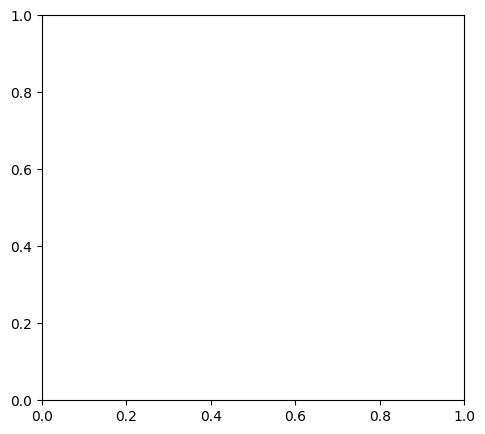

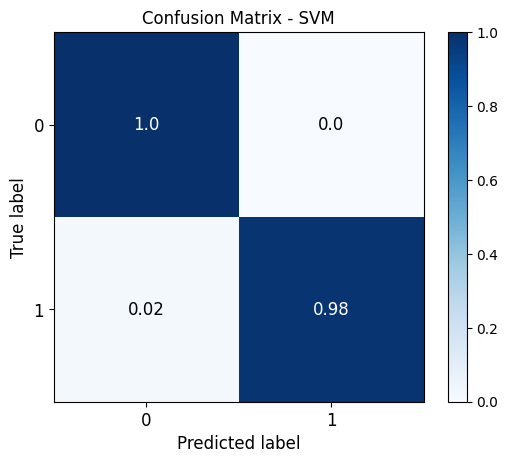

In [ ]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# Plot the confusion matrix
plt.figure(figsize=(12, 5))

# Confusion matrix for SVM
plt.subplot(1, 2, 1)
plot_confusion_matrix(test_labels, predictions, normalize=True, text_fontsize='large', cmap='Blues')
plt.title('Confusion Matrix - SVM')




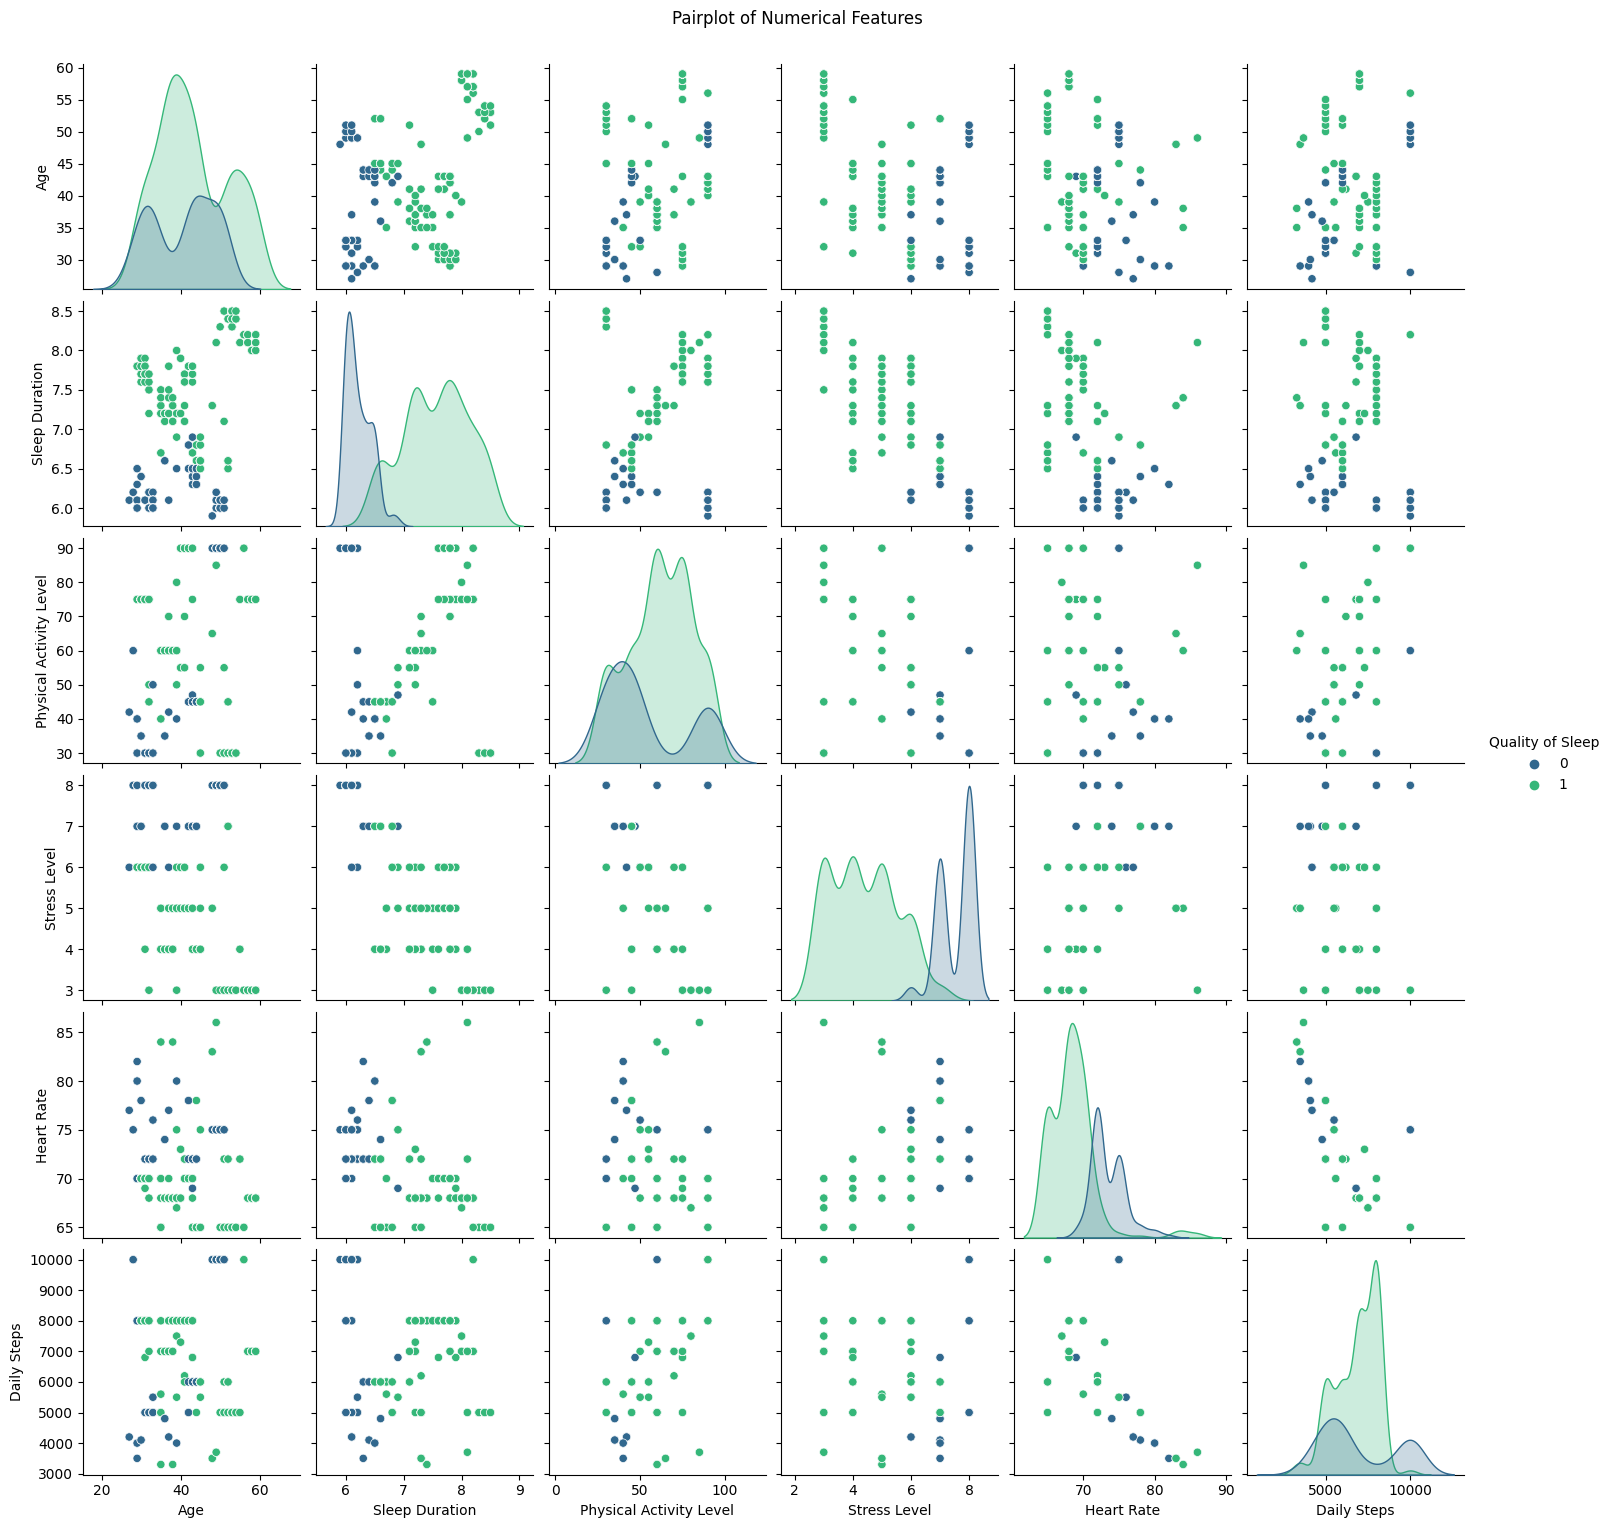

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between numerical features
sns.pairplot(df[features + [target]], hue=target, diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()



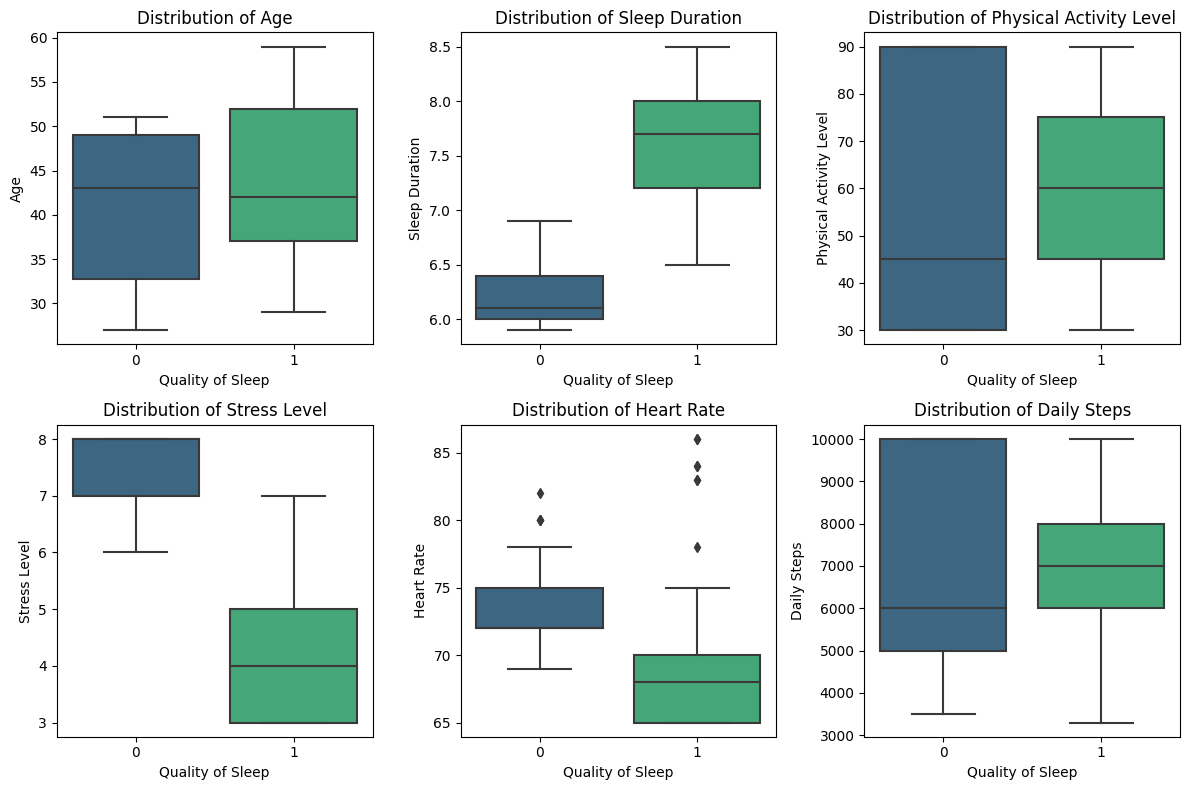

In [ ]:

# Boxplot to visualize the distribution of each feature for each class
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=target, y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


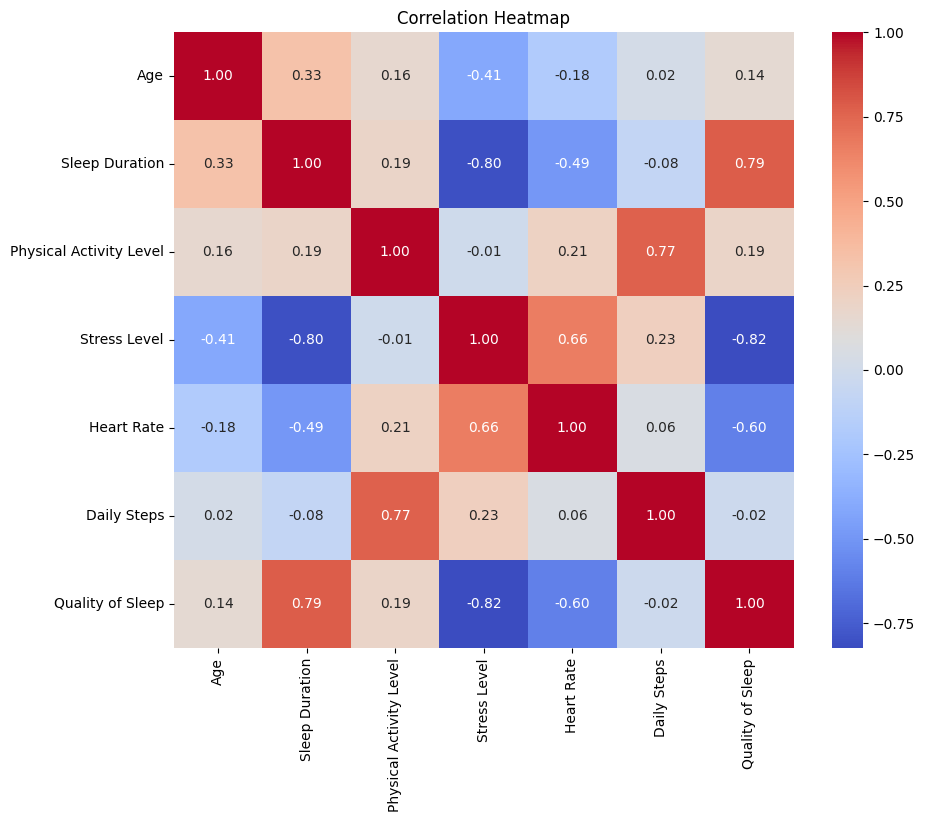

In [ ]:

# Correlation heatmap
correlation_matrix = df[features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Business Understanding:**

# **Occupational Sleep Patterns:**
# SVM confusion matrix evaluates sleep quality predictions, while the pairplot visually explores relationships between features, offering insights into how occupations impact health.


# **Stress, Health, and Sleep Quality:**
# Boxplots illustrate feature distributions for sleep quality classes, aiding in the visual comparison. The confusion matrix assesses SVM performance in predicting sleep quality based on stress and health conditions.


# **Daily Steps and Sleep Quality Across Gender:**
# The correlation heatmap and boxplots reveal feature relationships and variations across sleep quality classes. ROC plot and confusion matrix provide a comprehensive view of SVM's ability to predict sleep quality based on daily steps and gender.

# **Conclusion Of Every Individual Step:**

# **Data Cleaning:**
# Thoroughly cleaned and preprocessed data, handling missing values, outliers, and inconsistencies. Introduced key features like 'AgeGroup' for age categorization and normalized 'Quality of Sleep' using Min-Max scaling.

# **Data Exploration:**
# Conducted detailed exploration, showcasing descriptive statistics, histograms, and correlation matrices. Explored age-based sleep patterns and visualized stress levels, laying a foundation for deeper analyses.

# **Feature Engineering:**
# Engineered features for targeted analyses: 'AgeGroup' for age categorization, binary indicators for high stress and high blood pressure, and a feature identifying those exceeding a daily steps threshold.

# **Predictive Modeling (SVM):**
# Employed SVM to predict sleep quality. Achieved insights into how different features influence predictions, providing a quantitative understanding of relationships within the dataset.

# **Data Visualization:**
# Leveraged confusion matrices, pairplots, and boxplots to visually assess model performance and feature relationships. Explored how occupations, stress levels, and daily steps impact sleep quality.
